In [ ]:
!pip install tensorflow==2.13
!pip install --upgrade keras==2.13.1

In [ ]:
!pip install tensorflow-addons # Install tensorflow-addons first

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa # Import tensorflow_addons after installation
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

#required libraries
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data science preparation/Lung Cancer Dataset/archive (1).zip'
extract_dir = '/content/lung_cancer_dataset'
os.makedirs(extract_dir, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")

Dataset extracted to: /content/lung_cancer_dataset


In [ ]:
data_train = []
type_of_disease =['Bengin cases', 'Malignant cases','Normal cases']
data_directory = '/content/lung_cancer_dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/'
train_directory = os.path.join(data_directory)

for id, sp in enumerate(type_of_disease):

    for file in os.listdir(os.path.join(train_directory, sp)):

        data_train.append(['{}/{}/{}'.format(data_directory,sp, file), id, sp])




train = pd.DataFrame(data_train, columns=['Image', 'Id of Disease','Type of Disease'])

In [ ]:
del data_train

In [ ]:
train.head()

,Image,Id of Disease,Type of Disease
0,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases
1,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases
2,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases
3,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases
4,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases


In [ ]:
#make the order of training set randomize
SEED = 42
train = train.sample(frac=1, random_state=SEED)
train.index = np.arange(len(train))

In [ ]:
train.head()

,Image,Id of Disease,Type of Disease
0,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases
1,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,1,Malignant cases
2,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,0,Bengin cases
3,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,1,Malignant cases
4,/content/lung_cancer_dataset/The IQ-OTHNCCD lu...,1,Malignant cases


In [ ]:
SIZE_OF_IMAGE = 256
def read_image(imagepath):
    return cv2.imread(imagepath)

def resize_image(image, image_Size):
    return cv2.resize(image.copy(), image_Size, interpolation=cv2.INTER_AREA)

In [ ]:
from tqdm import tqdm
x_train = np.zeros((train.shape[0], SIZE_OF_IMAGE, SIZE_OF_IMAGE, 3))

for i, file in tqdm(enumerate(train['Image'].values)):
    image = read_image(file)

    if image is not None:
        x_train[i] = resize_image(image,(SIZE_OF_IMAGE, SIZE_OF_IMAGE))

X_Train = x_train / 255
print('Train shape: {}'.format(X_Train.shape))

1097it [00:04, 255.28it/s]


Train shape: (1097, 256, 256, 3)


In [ ]:
del x_train

In [ ]:
from tensorflow.keras.utils import to_categorical  # Import to_categorical from tensorflow.keras.utils

y_train = train['Id of Disease'].values
y_train2 = to_categorical(y_train, num_classes=3)

In [ ]:
y_train=np.zeros((y_train2.shape[0]))
for i in range(y_train2.shape[0]):
    if(y_train2[i][1]==1) :
        y_train[i]=1
    else :
        if (y_train2[i][2]==1) :
            y_train[i]=2

In [ ]:
#train and tes splitting
from sklearn.model_selection import train_test_split
BATCH_SIZE = 32

x_train, x_test, y_train, y_test = train_test_split(X_Train,y_train, test_size=0.2, random_state=SEED)

In [ ]:

num_classes = 3
input_shape = (256, 256, 3)

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (877, 256, 256, 3) - y_train shape: (877,)
x_test shape: (220, 256, 256, 3) - y_test shape: (220,)


In [ ]:
print(x_train[8])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 4
num_epochs = 100
image_size = 256  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 6
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 256 X 256
Patch size: 16 X 16
Patches per image: 256
Elements per patch: 768


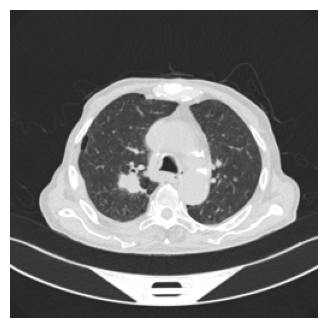

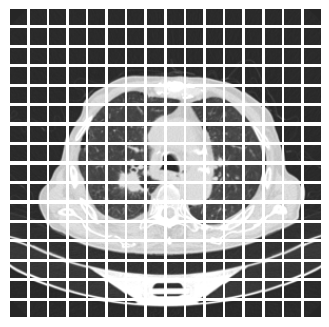

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[5]
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

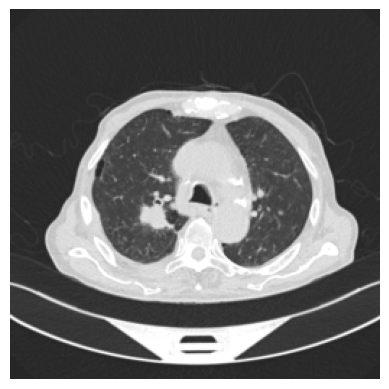

In [ ]:
image = x_train[5]

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
!pip install tensorflow-addons --upgrade  # Upgrade tensorflow-addons to latest version

import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

def run_experiment(model):
    # Use AdamW optimizer directly from tensorflow_addons.optimizers or tf.keras.optimizers
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(2, name="top-2-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
model = run_experiment(vit_classifier)

Epoch 1/100
198/198 [==============================] - 306s 1s/step - loss: 10.7876 - accuracy: 0.4905 - top-2-accuracy: 0.7972 - val_loss: 5.8533 - val_accuracy: 0.2159 - val_top-2-accuracy: 0.8182
Epoch 2/100
198/198 [==============================] - 291s 1s/step - loss: 2.0307 - accuracy: 0.5703 - top-2-accuracy: 0.8644 - val_loss: 0.8841 - val_accuracy: 0.6250 - val_top-2-accuracy: 0.8182
Epoch 3/100
198/198 [==============================] - 299s 2s/step - loss: 1.0614 - accuracy: 0.5970 - top-2-accuracy: 0.8517 - val_loss: 0.8152 - val_accuracy: 0.6477 - val_top-2-accuracy: 0.8523
Epoch 4/100
198/198 [==============================] - 298s 2s/step - loss: 0.9094 - accuracy: 0.6489 - top-2-accuracy: 0.8783 - val_loss: 0.7934 - val_accuracy: 0.5909 - val_top-2-accuracy: 0.8636
Epoch 5/100
198/198 [==============================] - 300s 2s/step - loss: 0.7734 - accuracy: 0.7022 - top-2-accuracy: 0.8897 - val_loss: 0.6195 - val_accuracy: 0.7386 - val_top-2-accuracy: 0.9205
Epoch 6/1

In [ ]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel ('epoch')
plt.legend(['acc','val'], loc='lower right')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt.legend(['loss','val'], loc='upper right')
plt.show()